# Activity - Random Number Generation
## Data Analytics Notebook W1

*Carreon, Ma. Addine Anne T.* | *B37* | *11/24/2023*

### Instructions

Write the corresponding Python code that addresses each of the given problems. For this activity, the following libraries would only be used.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Write the corresponding code in the given cell. If the code requires using multiple cells, you may add additional cells as necessary.

In [13]:
# Example: Write your answer in the code cells

If a given problem requires any Math input, you may use markdown cells with `$$` enclosed as your answer. Take note that the script used between `$$` uses LaTeX.

Example Markdown Code:
```python
$$f(x)=\sqrt[4]{3x}$$
```

Result:

$$f(x)=\sqrt[4]{3x}$$

For more details in LaTeX Math input, visit: https://en.wikibooks.org/wiki/LaTeX/Mathematics


Before submission, make sure to run all the given cells first, before saving and submitting the given task.

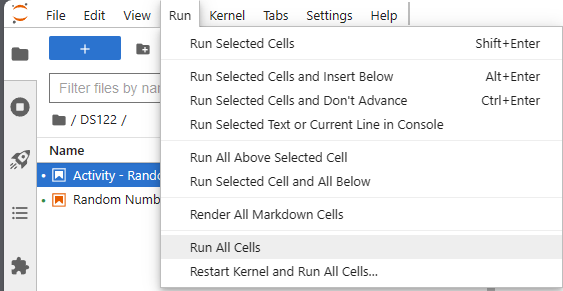

### Problems

#### 1. Random Variables using PCG

Using the default global generator (PCG64) with seed `990`, generate `10000` random numbers that follows the normal distribution with mean `0` and sigma of `2`. Afterwards, plot a histogram of the given random numbers.

Text(0, 0.5, 'Frequency')

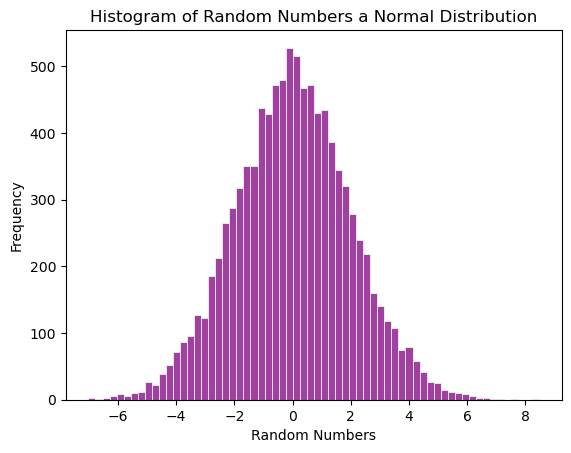

In [14]:
# Write your code here
mean = 0
sigma = 2

rvPCG = np.random.default_rng(990)
rn= rvPCG.normal(mean,sigma,10000)

fig, ax = plt.subplots()
sns.histplot(x=rn, ax=ax, color='purple', edgecolor='white')
ax.set_title("Histogram of Random Numbers a Normal Distribution")
ax.set_xlabel("Random Numbers")
ax.set_ylabel("Frequency")

#### 2. MT Generator for Random Sample

Using the Mersenne-Twister (MT-19937) generator, generate `2500` random samples (with replacement) with a distribution from the given list of numbers along with their corresponding probabilities.

| x    | 5   | 10   | 15   | 20  |
|------|-----|------|------|-----|
| **p(x)** | 0.3 | 0.25 | 0.35 | 0.1 |

Finally visualize the results using a count plot (or a bar graph).


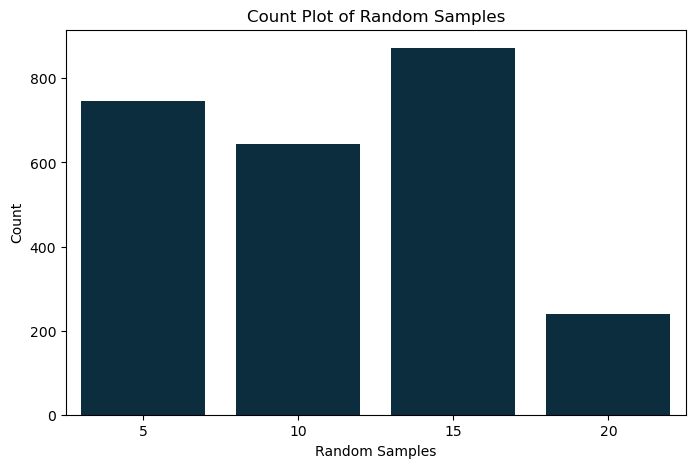

In [15]:
# Write your code here
x = np.array([5, 10, 15, 20])
p_of_x = np.array([0.3, 0.25, 0.35, 0.1])

np.random.MT19937()
rs = np.random.choice(x, size=2500, replace=True, p=p_of_x)

plt.figure(figsize=(8, 5))
sns.countplot(x=rs, color='#023047')
plt.title('Count Plot of Random Samples')
plt.xlabel('Random Samples')
plt.ylabel('Count')
plt.show()

#### 3.  Epanechnikov Kernel

Using the Philox generator, generate and visualize (using histogram) `50000` random numbers where its distribution follows the Epanechnikov Kernel function:

<h2>$$f(x)=\frac{3}{4}(1-x^2);\quad -1 \leq x \leq 1$$</h2>

And show the indefinite integral and its inverse function of the integral function. Note that the bounds are different from `[0,1]` in this particular function when comparing to the lesson example.

!!-- Write your Math solution here --!!
1. Solution:
<h2>$$F(x)=-\frac{x(x^2-3)}{4}+C$$</h2>

2. Inverse of Function
<h2>No inverse function</h2>

<Axes: >

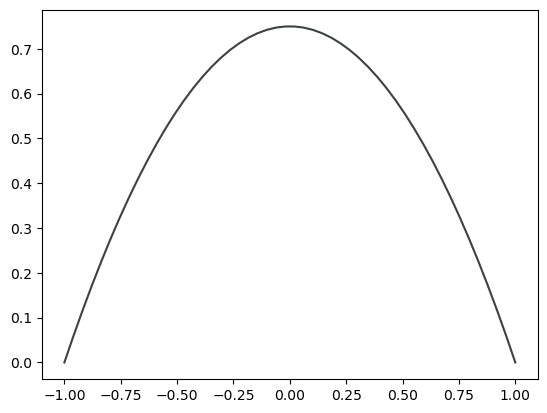

In [16]:
# Write your code here.
fig, ax = plt.subplots()

xdata = np.linspace(-1, 1)
ydata = 3/4*(1 - xdata**2)
sns.lineplot(x=xdata, y=ydata, ax=ax, color="#3C4142")

In [17]:
def epanechnikov_kernel(u):
    return np.where(np.abs(u) <= 1, 0.75 * (1 - u**2), 0)

def generate_random_epanechnikov(n_samples=50000):
    ng = np.random.default_rng(np.random.Philox())
    
    uv = np.random.uniform(-1, 1, size=n_samples)
    kv = epanechnikov_kernel(uv)
    kv /= np.sum(kv)
    rn = ng.choice(uv, size=n_samples, p=kv)

    return rn

rn = generate_random_epanechnikov()

Text(0.5, 1.0, 'The Distribution of the $f(x)=3/4*(1 - x^2)$')

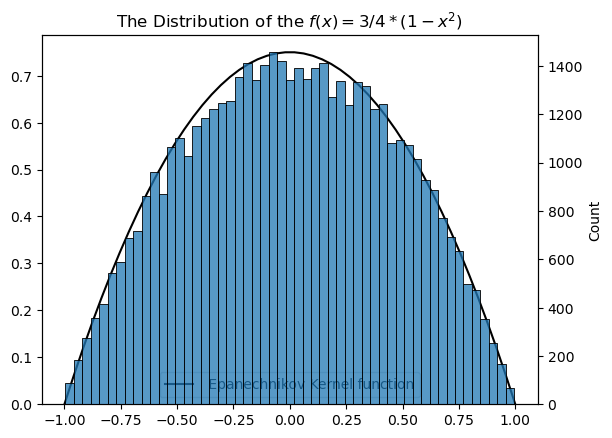

In [18]:
fig, ax = plt.subplots()
ax2 = ax.twinx()

xdata = np.linspace(-1, 1)
ydata = 3/4*(1 - xdata**2)

sns.lineplot(x=xdata, y=ydata, color='black', ax=ax, label=' Epanechnikov Kernel function')

sns.histplot(x=rn, ax=ax2)
ax.set_ylim(bottom=0)
ax.set_title('The Distribution of the $f(x)=3/4*(1 - x^2)$')

#### 4. Convolution Distribution

There are two distributions that follow the given functions shown below:

<h2>
$$f(x)=e^{-x}$$
<br>
$$g(x)=1-\tanh^2(x)$$
</h2>

Generate and visualize (using histogram) `100000` random numbers from the PCG64DXSM generator with an initial seed of `234` that follows the distribution from the function $R(x)$ where:

<h2>
$$R(x)=\frac{1}{2}f(x)+\frac{1}{2}g(x)$$
</h2>

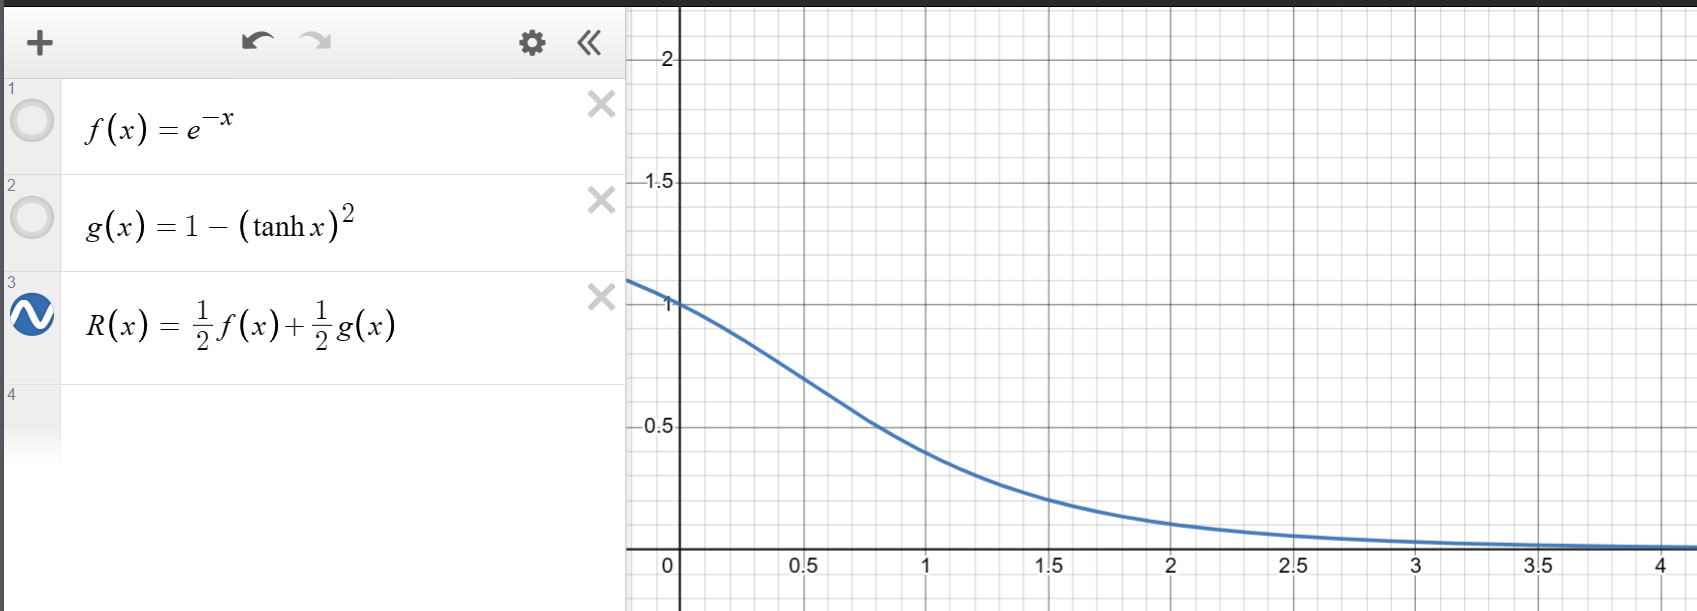

Text(0.5, 1.0, 'Convolution Distribution')

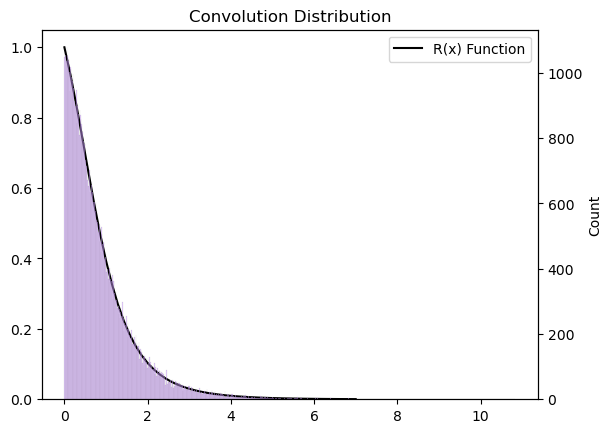

In [19]:
cd = np.random.default_rng(np.random.PCG64DXSM(234))

def f_distribution(x):
    return np.exp(-x)

def g_distribution(x):
    return 1-np.tanh(x)**2

def combined_distribution(x):
    return 0.5 * f_distribution(x) + 0.5 * g_distribution(x)

def inverse_transform_sampling(n_samples):
    its = cd.random(n_samples)
    samples = np.piecewise(its, [its < 0.5, its >= 0.5], [lambda x: -np.log(1 - 2*x), lambda x: np.arctanh(1 - 2*(x - 0.5))])
    return samples

rn = 100000
samples = inverse_transform_sampling(rn)

fig, ax = plt.subplots()
ax2 = ax.twinx()

xdata = np.linspace(0, 7)

sns.lineplot(x=xdata,y=combined_distribution(xdata), color='black', ax=ax, label='R(x) Function')
sns.histplot(x=samples, ax=ax2, bins=1000, alpha=0.5,color='#CF9FFF', label='Samples')

ax.set_ylim(0)
ax.set_title('Convolution Distribution')

---

<h3><center>END OF FILE</center></h3>

---